In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier, XGBRFClassifier

from helpers.split import label_strings, tag_label_feature_split

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def cross_gradient_boost_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # calculate sample weights to deal with class imbalance
    sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)
    model = XGBClassifier(
        use_label_encoder=False, objective="multi:softprob", eval_metric="mlogloss",
    )

    model.fit(X_train_std, y_train, sample_weight=sample_weights)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")
    plt.show()

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.886944

                 precision    recall  f1-score   support

    genre_blues     0.9280    1.0000    0.9627       374
genre_classical     0.9451    0.9337    0.9393      4221
  genre_country     0.9185    1.0000    0.9575       327
    genre_disco     0.8865    1.0000    0.9398       289
   genre_hiphop     0.8356    0.9559    0.8917      1701
     genre_jazz     0.7745    0.9799    0.8652      1241
    genre_metal     0.9288    1.0000    0.9631       665
      genre_pop     0.9168    0.7527    0.8267      4274
   genre_reggae     0.7839    0.9987    0.8783       788
     genre_rock     0.8789    0.8459    0.8621      3200

       accuracy                         0.8869     17080
      macro avg     0.8797    0.9467    0.9086     17080
   weighted avg     0.8924    0.8869    0.8855     17080

Test: test_accuracy = 0.523063

                 precision    recall  f1-score   support

    genre_blues     0.

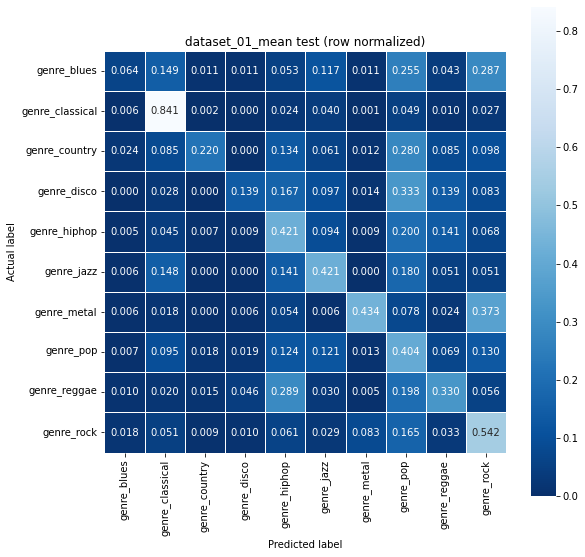



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.996136

                 precision    recall  f1-score   support

    genre_blues     0.9973    1.0000    0.9987       374
genre_classical     0.9979    0.9974    0.9976      4221
  genre_country     1.0000    1.0000    1.0000       327
    genre_disco     1.0000    1.0000    1.0000       289
   genre_hiphop     0.9959    1.0000    0.9979      1701
     genre_jazz     0.9952    0.9992    0.9972      1241
    genre_metal     1.0000    1.0000    1.0000       665
      genre_pop     0.9965    0.9890    0.9927      4274
   genre_reggae     0.9987    1.0000    0.9994       788
     genre_rock     0.9916    0.9978    0.9947      3200

       accuracy                         0.9961     17080
      macro avg     0.9973    0.9983    0.9978     17080
   weighted avg     0.9961    0.9961    0.9961     17080

Test: test_accuracy = 0.639195

                 precision    recall  f1-score   support

    genre_blues   

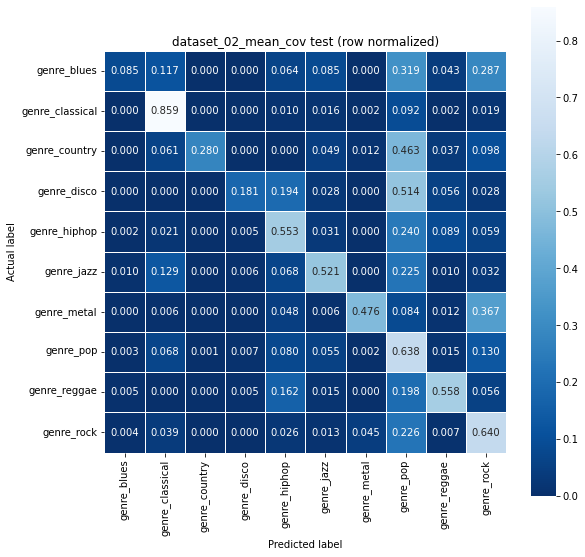



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.996194

                 precision    recall  f1-score   support

    genre_blues     0.9947    1.0000    0.9973       374
genre_classical     0.9920    0.9976    0.9948      4221
  genre_country     1.0000    1.0000    1.0000       327
    genre_disco     1.0000    1.0000    1.0000       289
   genre_hiphop     0.9982    1.0000    0.9991      1701
     genre_jazz     0.9976    0.9992    0.9984      1241
    genre_metal     1.0000    1.0000    1.0000       665
      genre_pop     0.9972    0.9892    0.9932      4274
   genre_reggae     1.0000    1.0000    1.0000       788
     genre_rock     0.9966    0.9975    0.9970      3200

       accuracy                         0.9962     17080
      macro avg     0.9976    0.9984    0.9980     17080
   weighted avg     0.9962    0.9962    0.9962     17080

Test: test_accuracy = 0.631468

                 precision    recall  f1-score   support

    genre_blues  

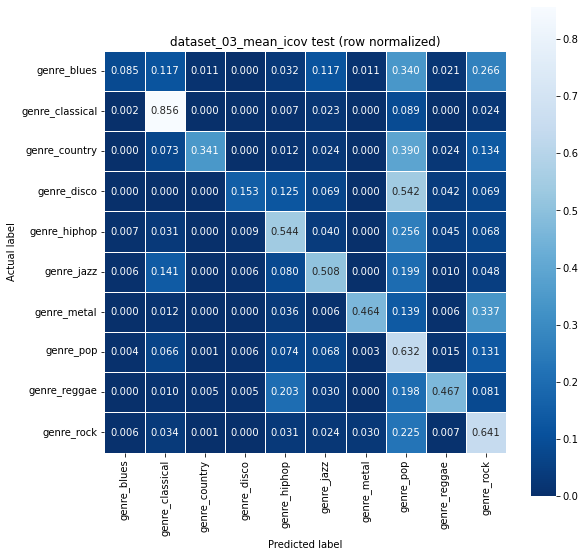



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.999122

                 precision    recall  f1-score   support

    genre_blues     0.9973    1.0000    0.9987       374
genre_classical     0.9993    0.9995    0.9994      4221
  genre_country     1.0000    1.0000    1.0000       327
    genre_disco     1.0000    1.0000    1.0000       289
   genre_hiphop     0.9988    1.0000    0.9994      1701
     genre_jazz     1.0000    0.9992    0.9996      1241
    genre_metal     1.0000    1.0000    1.0000       665
      genre_pop     0.9998    0.9974    0.9986      4274
   genre_reggae     1.0000    1.0000    1.0000       788
     genre_rock     0.9975    0.9997    0.9986      3200

       accuracy                         0.9991     17080
      macro avg     0.9993    0.9996    0.9994     17080
   weighted avg     0.9991    0.9991    0.9991     17080

Test: test_accuracy = 0.644346

                 precision    recall  f1-score   support

    genre_blu

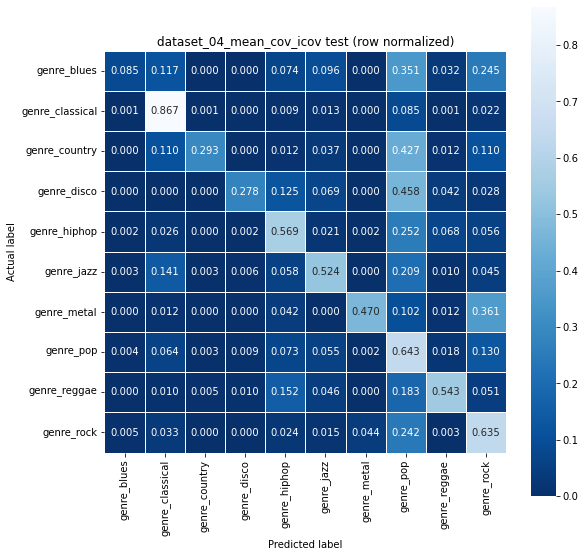



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.825234

                 precision    recall  f1-score   support

    genre_blues     0.7435    1.0000    0.8529       374
genre_classical     0.9398    0.9209    0.9302      4221
  genre_country     0.7047    1.0000    0.8268       327
    genre_disco     0.8006    1.0000    0.8892       289
   genre_hiphop     0.7538    0.8983    0.8197      1701
     genre_jazz     0.6973    0.9670    0.8103      1241
    genre_metal     0.8240    1.0000    0.9035       665
      genre_pop     0.8804    0.6270    0.7324      4274
   genre_reggae     0.6477    0.9987    0.7858       788
     genre_rock     0.8415    0.7369    0.7857      3200

       accuracy                         0.8252     17080
      macro avg     0.7833    0.9149    0.8337     17080
   weighted avg     0.8413    0.8252    0.8219     17080

Test: test_accuracy = 0.514165

                 precision    recall  f1-score   support

    genre_blues     0.

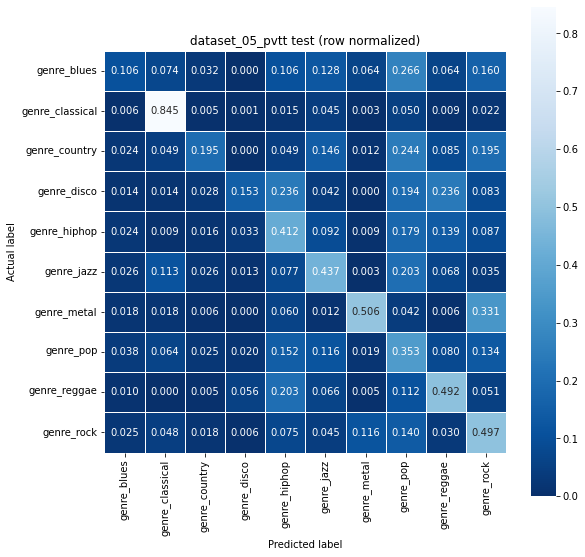



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.944731

                 precision    recall  f1-score   support

    genre_blues     0.9664    1.0000    0.9829       374
genre_classical     0.9823    0.9709    0.9765      4221
  genre_country     0.9703    1.0000    0.9849       327
    genre_disco     0.9797    1.0000    0.9897       289
   genre_hiphop     0.9013    0.9929    0.9449      1701
     genre_jazz     0.8736    0.9968    0.9311      1241
    genre_metal     0.9837    1.0000    0.9918       665
      genre_pop     0.9557    0.8636    0.9073      4274
   genre_reggae     0.9110    1.0000    0.9534       788
     genre_rock     0.9318    0.9306    0.9312      3200

       accuracy                         0.9447     17080
      macro avg     0.9456    0.9755    0.9594     17080
   weighted avg     0.9464    0.9447    0.9443     17080

Test: test_accuracy = 0.597752

                 precision    recall  f1-score   support

    genre_blues  

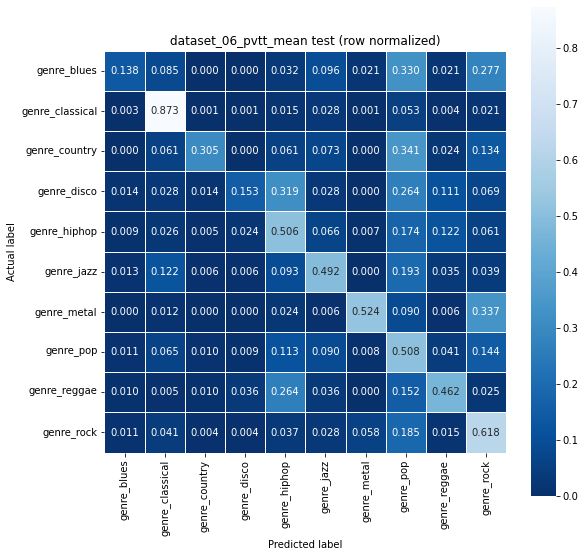



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.998478

                 precision    recall  f1-score   support

    genre_blues     1.0000    1.0000    1.0000       374
genre_classical     0.9993    0.9995    0.9994      4221
  genre_country     1.0000    1.0000    1.0000       327
    genre_disco     1.0000    1.0000    1.0000       289
   genre_hiphop     0.9982    1.0000    0.9991      1701
     genre_jazz     0.9984    1.0000    0.9992      1241
    genre_metal     1.0000    1.0000    1.0000       665
      genre_pop     0.9995    0.9946    0.9971      4274
   genre_reggae     1.0000    1.0000    1.0000       788
     genre_rock     0.9950    0.9997    0.9973      3200

       accuracy                         0.9985     17080
      macro avg     0.9990    0.9994    0.9992     17080
   weighted avg     0.9985    0.9985    0.9985     17080

Test: test_accuracy = 0.657691

                 precision    recall  f1-score   support

    genre_blu

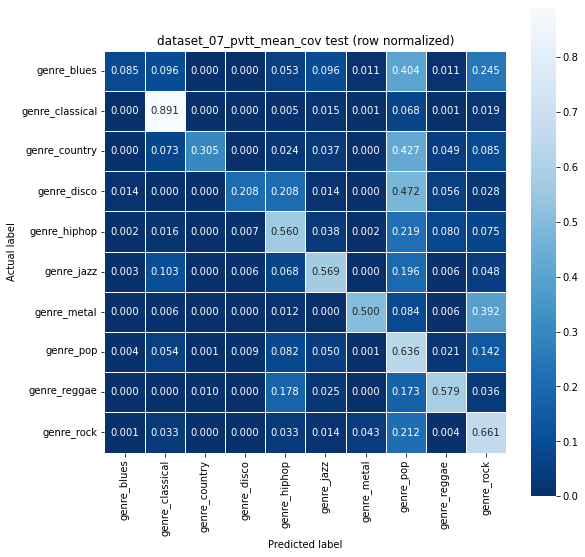



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.997658

                 precision    recall  f1-score   support

    genre_blues     1.0000    1.0000    1.0000       374
genre_classical     0.9953    0.9988    0.9970      4221
  genre_country     1.0000    1.0000    1.0000       327
    genre_disco     1.0000    1.0000    1.0000       289
   genre_hiphop     0.9982    1.0000    0.9991      1701
     genre_jazz     0.9992    1.0000    0.9996      1241
    genre_metal     1.0000    1.0000    1.0000       665
      genre_pop     0.9988    0.9930    0.9959      4274
   genre_reggae     1.0000    1.0000    1.0000       788
     genre_rock     0.9966    0.9984    0.9975      3200

       accuracy                         0.9977     17080
      macro avg     0.9988    0.9990    0.9989     17080
   weighted avg     0.9977    0.9977    0.9977     17080

Test: test_accuracy = 0.646219

                 precision    recall  f1-score   support

    genre_bl

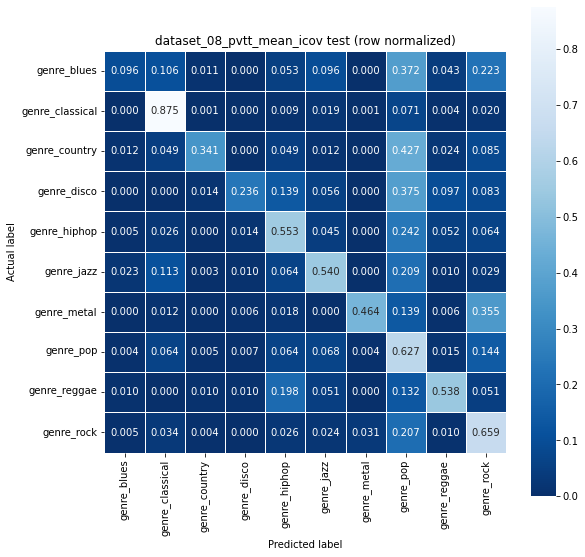



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle



In [ ]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "*.pickle")])
for dataset in datasets:
    cross_gradient_boost_experiment(dataset)